In [1]:
import os 
os.chdir('D:\KSS')

In [2]:
import pandas as pd 

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train['source']='train'
test['source']='test'

In [5]:
data=pd.concat([train,test],ignore_index=True)
train.shape ,test.shape,data.shape

C:\Users\a.saikrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


((8523, 12), (5681, 11), (14204, 12))

In [6]:
data.drop('ID',axis=1)

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,249.8092,3735.1380,Dairy,0.016047,9.300,1999,Tier 1,Medium,Supermarket Type1,train
1,Regular,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,141.6180,2097.2700,Meat,0.016760,17.500,1999,Tier 1,Medium,Supermarket Type1,train
3,Regular,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,Tier 3,NaN,Grocery Store,train
4,Low Fat,53.8614,994.7052,Household,0.000000,8.930,1987,Tier 3,High,Supermarket Type1,train
5,Regular,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,Tier 3,Medium,Supermarket Type2,train
6,Regular,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,Tier 3,High,Supermarket Type1,train
7,Low Fat,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,Tier 3,Medium,Supermarket Type3,train
8,Regular,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,Tier 2,NaN,Supermarket Type1,train
9,Regular,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,Tier 2,NaN,Supermarket Type1,train


In [7]:
data.isnull().sum()

ID                              0
Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [8]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
from scipy.stats import mode

data['Outlet_Size'].fillna(mode(data['Outlet_Size']).mode[0],inplace=True)

C:\Users\a.saikrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [10]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})


In [11]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [12]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [13]:
pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Size'],margins=True)

Outlet_Size,High,Medium,Small,All
Outlet_Location_Type,,,,
Tier 1,0,1550,2430,3980
Tier 2,0,3091,1550,4641
Tier 3,1553,4030,0,5583
All,1553,8671,3980,14204


In [14]:
data.dtypes

ID                            object
Item_Fat_Content              object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [15]:
data = pd.get_dummies(data,columns= ['Item_Type','Item_Fat_Content','Outlet_Size','Outlet_Type','Outlet_Location_Type'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 35 columns):
ID                                 14204 non-null object
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Outlet_Establishment_Year          14204 non-null int64
source                             14204 non-null object
Item_Type_Baking Goods             14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 non-null uint8
Item_Type_Fruits and Vegetables    14204 non-null uint8
Item_Type_Hard Drinks              14204 non-null uint8
Item_Type_Health and Hygiene       14204 n

In [17]:
data.shape

(14204, 35)

In [18]:
train = data.loc[data['source']=="train"]
test=data.loc[data['source']=="test"]

In [19]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\a.saikrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [21]:
#model building 

Train= pd.read_csv('train_modified.csv')

In [22]:
Train.columns

Index(['ID', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3'],
      dtype='object')

In [23]:
#data Exploring using bivariate analysis
import matplotlib.pyplot as plot
%matplotlib inline


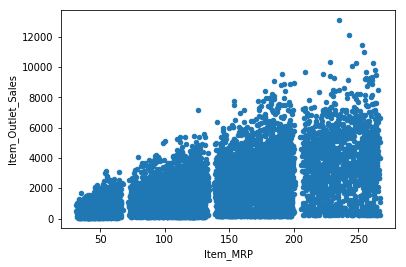

In [24]:
Train.plot.scatter('Item_MRP','Item_Outlet_Sales')


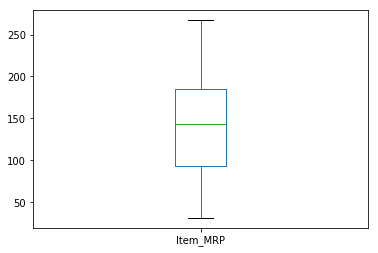

In [25]:
Train['Item_MRP'].plot.box()

In [26]:
X_Train=Train.drop(['ID','Item_Outlet_Sales'],axis=1)

In [48]:
X_Train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,249.8092,0.016047,9.30,1999,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,48.2692,0.019278,5.92,2009,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,141.6180,0.016760,17.50,1999,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,182.0950,0.000000,19.20,1998,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,53.8614,0.000000,8.93,1987,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
Y_Train=Train['Item_Outlet_Sales']

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
Linear=LinearRegression()

In [46]:
Linear.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
#test
Test=pd.read_csv('test_modified.csv')

In [32]:
Test.head()

,ID,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDW58OUT049,107.8622,0.007565,20.750000,1999,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,FDW14OUT017,87.3198,0.038428,8.300000,2007,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,NCN55OUT010,241.7538,0.099575,14.600000,1998,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,FDQ58OUT017,155.0340,0.015388,7.315000,2007,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38OUT027,234.2300,0.118599,12.792854,1985,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [33]:
Test_P=Test.drop(['ID'],axis=1)

In [34]:
Predication= Linear.predict(Test_P)

In [35]:
Y_test = pd.DataFrame(Predication)

In [45]:
Test_P.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,107.8622,0.007565,20.750000,1999,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,87.3198,0.038428,8.300000,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,241.7538,0.099575,14.600000,1998,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,155.0340,0.015388,7.315000,2007,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,234.2300,0.118599,12.792854,1985,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [36]:
Linear.score(X_Train,Y_Train)

0.5634674092368712

In [37]:
Predication

array([1790.72994234, 1568.26909476, 1880.21927437, ..., 1832.28928741,
       3624.96885115, 1294.9045997 ])

In [38]:
Linear.score(Test_P,Y_test)

1.0

In [39]:
type(Predication)

numpy.ndarray

In [40]:
Y_test

,0
0,1790.729942
1,1568.269095
2,1880.219274
3,2620.137124
4,5136.307520
5,2000.520904
6,590.962194
7,2782.835488
8,1502.917822
9,3128.916733


In [41]:
Test_P

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,107.8622,0.007565,20.750000,1999,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,87.3198,0.038428,8.300000,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,241.7538,0.099575,14.600000,1998,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,155.0340,0.015388,7.315000,2007,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,234.2300,0.118599,12.792854,1985,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
5,117.1492,0.063817,9.800000,1997,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6,50.1034,0.082602,19.350000,2009,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,81.0592,0.015782,12.792854,1985,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
8,95.7436,0.123365,6.305000,2002,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
9,186.8924,0.005698,5.985000,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
